#Tarea 3

Para utilizar este código basta con apretar 'Entorno de ejecución' -> Ejecutar todas y en la primera celda de código subir el archivo magic04.data

In [22]:
#subir archivo diabetes.arff
from google.colab import files
uploaded= files.upload()

Saving diabetes.arff to diabetes (1).arff


In [23]:
#Bibliotecas
from scipy.io import arff#
%matplotlib inline
import pandas as pd#
import numpy as np#
import seaborn as sns#
import time#
import sklearn#

In [24]:
#p1 b
from sklearn.model_selection import train_test_split

data = arff.loadarff('diabetes.arff')
df= pd.DataFrame(data[0])
df['class'].replace(b'tested_positive',0, inplace = True) #df[‘class’].str.decode(‘utf-8’)
df['class'].replace(b'tested_negative',1, inplace = True) 

entrenamiento= train_test_split(df,test_size=0.60, random_state=7)[1].reset_index(drop = True)
validacion= train_test_split(df,test_size=0.2, random_state=7)[1].reset_index(drop = True)
test= train_test_split(df,test_size=0.2, random_state=7)[1].reset_index(drop = True)

In [25]:
#Parte c
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
#scaler_entrenado=scaler.fit(entrenamiento.iloc[:,:8]) #Entrenamiento de standardscaler

#Aplicación de standardscaler a conjuntos
scaled_entrenamiento= scaler.fit_transform(entrenamiento.iloc[:,:8])
scaled_validacion= scaler.fit_transform(validacion.iloc[:,:8]) 
scaled_test= scaler.fit_transform(test.iloc[:,:8]) 

In [26]:
#Parte d
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

test_fold = [-1 for _ in range(len(validacion))] + [0 for _ in range(len(entrenamiento))]
y = np.concatenate([scaled_validacion, scaled_entrenamiento])
ps = PredefinedSplit(test_fold)

parametros= {'C':[0.0001, 0.001, 0.1]}
svmlineal = svm.SVC(kernel= 'linear', probability=False)
clfl = GridSearchCV(svmlineal, parametros, cv=ps)

scaled_concat = np.concatenate((scaled_entrenamiento,scaled_validacion))
conjuntos_concat= pd.concat([entrenamiento,validacion])
conjuntos_concat= conjuntos_concat.reset_index(drop= True)

tiempo_svmlineal_inicio = time.time()
clfl.fit( scaled_concat , conjuntos_concat.iloc[:,8])#entrenamiento

tiempo_svmlineal_final = time.time()

print(clfl.best_params_)
y_pred_svml=clfl.predict(scaled_concat)
print(f"Tiempo de entrenamiento: {tiempo_svmlineal_final - tiempo_svmlineal_inicio} [s]")

{'C': 0.1}
Tiempo de entrenamiento: 0.01575469970703125 [s]


accuracy = 0.7428488372093023


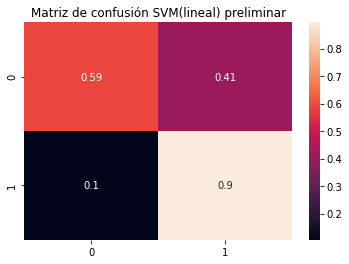

In [42]:
#Parte e
matriz_confusion_svml = sklearn.metrics.confusion_matrix(conjuntos_concat.iloc[:,8], y_pred_svml, normalize='true')
print(f'accuracy = {(matriz_confusion_svml[0][0]+matriz_confusion_svml[1][1])/2}')

plt.figure()
sns.heatmap(matriz_confusion_svml, annot= True)
plt.title('Matriz de confusión SVM(lineal) preliminar')
plt.show()

In [28]:
#Parte f 
from sklearn.feature_selection import SelectFromModel

seleccion = SelectFromModel(estimator=svm.SVC(kernel= 'linear',C=0.1, probability=False)).fit(scaled_entrenamiento, entrenamiento.iloc[:,8])


caract= ['preg','plas','pres','skin','insu','mass','pedi','age']
seleccion.get_support()
L=[]
val = []
for i in range(len(caract)):
    if seleccion.get_support()[i] == True:
        L.append(caract[i])
        val.append(seleccion.estimator_.coef_[0][i])
        print(i)
    else: None 
print(f"Las mejores características son: {L}")

1
5
Las mejores características son: ['plas', 'mass']


In [50]:
#Parte g
car1= scaled_entrenamiento[:,1]
car2= scaled_entrenamiento[:,5]
cars= np.array([car1,car2])
tiempo_svmlineal2_inicio = time.time()
svml2 = svm.SVC(kernel= 'linear',C=0.1, probability=False).fit(cars.transpose(), entrenamiento.iloc[:,8])
tiempo_svmlineal2_final = time.time()
print(f"El tiempo de entrenamiento es {tiempo_svmlineal2_final - tiempo_svmlineal2_inicio} [s]")

El tiempo de entrenamiento es 0.005527496337890625 [s]


accuracy = 0.7043769216856575


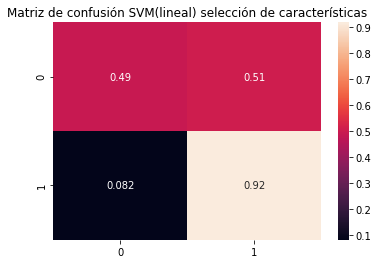

In [51]:
#Parte h
carv1= scaled_validacion[:,1]
carv2= scaled_validacion[:,5]
carsv= np.array([carv1,carv2])
y_pred_svml2 = svml2.predict(carsv.transpose()) #se concatenan las filas traspuestas para que sean columnas
matriz_confusion_svml2 = sklearn.metrics.confusion_matrix(validacion.iloc[:,8], y_pred_svml2, normalize='true')
print(f'accuracy = {(matriz_confusion_svml2[0][0]+matriz_confusion_svml2[1][1])/2}')

plt.figure()
sns.heatmap(matriz_confusion_svml2, annot= True)
plt.title('Matriz de confusión SVM(lineal) selección de características')
plt.show()

Las mejores 4 características son: ['preg', 'plas', 'mass', 'age']
El tiempo de entrenamiento es 0.007052421569824219 [s]
accuracy = 0.7430819316332067


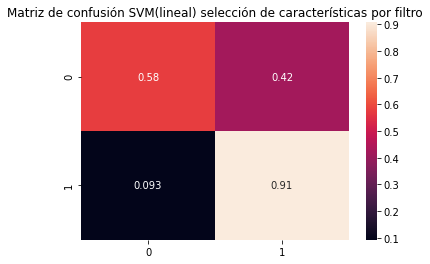

In [44]:
#Parte i
from sklearn.feature_selection import SelectKBest
seleccion2 = SelectKBest(k=4).fit_transform(scaled_entrenamiento, entrenamiento.iloc[:,8])
caract= ['preg','plas','pres','skin','insu','mass','pedi','age']
L=[]
for i in range(len(caract)): ##No pude obtnerlo mediante get_param asi que se improviso con una revision por fuerza bruta
    if scaled_entrenamiento[0][i] in seleccion2[0] :
        L.append(caract[i])
    else: None 
print(f"Las mejores 4 características son: {L}")
###############################################
#g
car1i= scaled_entrenamiento[:,0]
car2i= scaled_entrenamiento[:,1]
car3i= scaled_entrenamiento[:,5]
car4i= scaled_entrenamiento[:,7]
carsi= np.array([car1i,car2i,car3i,car4i])
tiempo_svmlineali_inicio = time.time()
svmli = svm.SVC(kernel= 'linear',C=0.1, probability=False).fit(carsi.transpose(), entrenamiento.iloc[:,8])
tiempo_svmlineali_final = time.time()
print(f"El tiempo de entrenamiento es {tiempo_svmlineali_final - tiempo_svmlineali_inicio} [s]")
######################################
#h
carv1i= scaled_validacion[:,0]
carv2i= scaled_validacion[:,1]
carv3i= scaled_validacion[:,5]
carv4i= scaled_validacion[:,7]
carsvi= np.array([carv1i,carv2i,carv3i,carv4i])
y_pred_svmli = svmli.predict(carsvi.transpose()) #se concatenan las filas traspuestas para que sean columnas
matriz_confusion_svmli = sklearn.metrics.confusion_matrix(validacion.iloc[:,8], y_pred_svmli, normalize='true')
print(f'accuracy = {(matriz_confusion_svmli[0][0]+matriz_confusion_svmli[1][1])/2}')

plt.figure()
sns.heatmap(matriz_confusion_svmli,annot=True)
plt.title('Matriz de confusión SVM(lineal) selección de características por filtro')
plt.show()

Las mejores 2 características son: ['plas', 'mass']
El tiempo de entrenamiento es 0.005134105682373047 [s]
accuracy = 0.7043769216856575


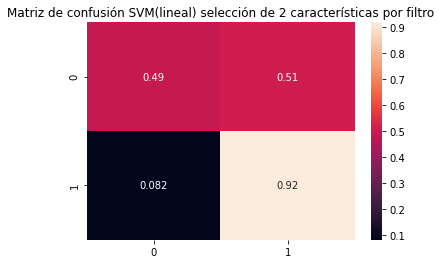

In [45]:
#Parte j
from sklearn.feature_selection import SelectKBest
seleccionj = SelectKBest(k=2).fit_transform(scaled_entrenamiento, entrenamiento.iloc[:,8])
caract= ['preg','plas','pres','skin','insu','mass','pedi','age']
L=[]
for i in range(len(caract)): ##No pude obtnerlo mediante get_param asi que se improviso con una revision por fuerza bruta
    if scaled_entrenamiento[0][i] in seleccionj[0] :
        L.append(caract[i])
    else: None 
print(f"Las mejores 2 características son: {L}")


###############################################
#g
car1j= scaled_entrenamiento[:,1]
car2j= scaled_entrenamiento[:,5]
carsj= np.array([car1j,car2j])
tiempo_svmlinealj_inicio = time.time()
svmlj = svm.SVC(kernel= 'linear',C=0.1, probability=False).fit(carsj.transpose(), entrenamiento.iloc[:,8])
tiempo_svmlinealj_final = time.time()
print(f"El tiempo de entrenamiento es {tiempo_svmlinealj_final - tiempo_svmlinealj_inicio} [s]")
######################################
#h
carv1j= scaled_validacion[:,1]
carv2j= scaled_validacion[:,5]
carsvj= np.array([carv1j,carv2j])
y_pred_svmlj = svmlj.predict(carsvj.transpose()) #se concatenan las filas traspuestas para que sean columnas
matriz_confusion_svmlj = sklearn.metrics.confusion_matrix(validacion.iloc[:,8], y_pred_svmlj, normalize='true')
print(f'accuracy = {(matriz_confusion_svmlj[0][0]+matriz_confusion_svmlj[1][1])/2}')

plt.figure()
sns.heatmap(matriz_confusion_svmlj, annot= True)
plt.title('Matriz de confusión SVM(lineal) selección de 2 características por filtro')
plt.show()

{'n_estimators': 200}
Tiempo de entrenamiento: 1.2915973663330078 [s]
accuracy = 0.7676744186046511


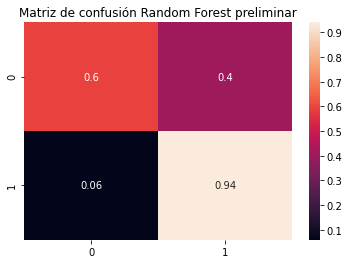

In [46]:
#Parte k
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
#######################
#Parte d
test_fold = [-1 for _ in range(len(validacion))] + [0 for _ in range(len(entrenamiento))]
y = np.concatenate([scaled_validacion, scaled_entrenamiento])
ps = PredefinedSplit(test_fold)

parametros= {'n_estimators' : [50, 100, 150, 200, 250]}
rf = RandomForestClassifier(max_depth=3, random_state=0)
rfk = GridSearchCV(rf, parametros, cv=ps)

scaled_concat = np.concatenate((scaled_entrenamiento,scaled_validacion))
conjuntos_concat= pd.concat([entrenamiento,validacion])
conjuntos_concat= conjuntos_concat.reset_index(drop= True)

tiempo_rfk_inicio = time.time()
rfk.fit( scaled_concat , conjuntos_concat.iloc[:,8])#entrenamiento

tiempo_rfk_final = time.time()

print(rfk.best_params_)
y_pred_rfk= rfk.predict(scaled_concat)
print(f"Tiempo de entrenamiento: {tiempo_rfk_final - tiempo_rfk_inicio} [s]")

######################
#Parte e
matriz_confusion_rfk = sklearn.metrics.confusion_matrix(conjuntos_concat.iloc[:,8], y_pred_rfk, normalize='true')
print(f'accuracy = {(matriz_confusion_rfk[0][0]+matriz_confusion_rfk[1][1])/2}')

plt.figure()
sns.heatmap(matriz_confusion_rfk, annot= True)
plt.title('Matriz de confusión Random Forest preliminar')
plt.show()

Las mejores características son: ['plas', 'mass']
El tiempo de entrenamiento es 0.2616539001464844 [s]
accuracy = 0.7167661421595225


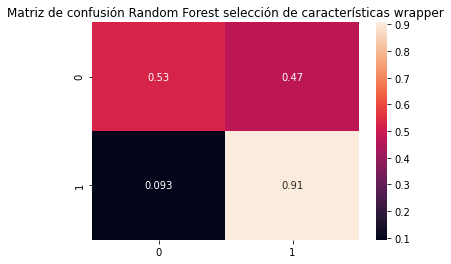

In [52]:
#Parte l
from sklearn.feature_selection import SelectFromModel
seleccionl = SelectFromModel(estimator=RandomForestClassifier(max_depth=3, random_state=0,n_estimators=200)).fit(scaled_entrenamiento, entrenamiento.iloc[:,8])


caract= ['preg','plas','pres','skin','insu','mass','pedi','age']
seleccionl.get_support()
Ll=[]
vall = []
for i in range(len(caract)):
    if seleccion.get_support()[i] == True:
        Ll.append(caract[i])
        vall.append(seleccion.estimator_.coef_[0][i])
    else: None 
print(f"Las mejores características son: {Ll}") #index 1 y 5

####################################
#Parte g
car1l= scaled_entrenamiento[:,1]
car2l= scaled_entrenamiento[:,5]
carsl= np.array([car1l,car2l])
tiempo_rfl_inicio = time.time()
rfl = RandomForestClassifier(max_depth=3, random_state=0,n_estimators=200).fit(cars.transpose(), entrenamiento.iloc[:,8])
tiempo_rfl_final = time.time()
print(f"El tiempo de entrenamiento es {tiempo_rfl_final - tiempo_rfl_inicio} [s]")

#####################################
#Parte h
carv1l= scaled_validacion[:,1]
carv2l= scaled_validacion[:,5]
carsvl= np.array([carv1l,carv2l])
y_pred_rfl = rfl.predict(carsvl.transpose()) #se concatenan las filas traspuestas para que sean columnas
matriz_confusion_rfl = sklearn.metrics.confusion_matrix(validacion.iloc[:,8], y_pred_rfl, normalize='true')
print(f'accuracy = {(matriz_confusion_rfl[0][0]+matriz_confusion_rfl[1][1])/2}')

plt.figure()
sns.heatmap(matriz_confusion_rfl, annot= True)
plt.title('Matriz de confusión Random Forest selección de características wrapper')
plt.show()

0
1
5
7
Las mejores 4 características son: ['preg', 'plas', 'mass', 'age']
El tiempo de entrenamiento es 0.26888418197631836 [s]
accuracy = 0.739464640983903


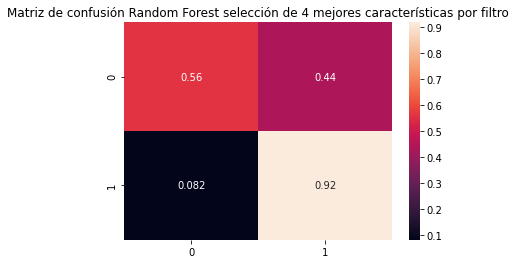

In [53]:
#Parte m
from sklearn.feature_selection import SelectKBest
seleccionm = SelectKBest(k=4).fit_transform(scaled_entrenamiento, entrenamiento.iloc[:,8])
caract= ['preg','plas','pres','skin','insu','mass','pedi','age']
L=[]
for i in range(len(caract)): ##No pude obtnerlo mediante get_param asi que se improviso con una revision por fuerza bruta
    if scaled_entrenamiento[0][i] in seleccionm[0] :
        L.append(caract[i])
        print(i)
    else: None 
print(f"Las mejores 4 características son: {L}")
###############################################
#g
car1m= scaled_entrenamiento[:,0]
car2m= scaled_entrenamiento[:,1]
car3m= scaled_entrenamiento[:,5]
car4m= scaled_entrenamiento[:,7]
carsm= np.array([car1m,car2m,car3m,car4m])
tiempo_rfm_inicio = time.time()
rfm = RandomForestClassifier(max_depth=3, random_state=0,n_estimators=200).fit(carsm.transpose(), entrenamiento.iloc[:,8])
tiempo_rfm_final = time.time()
print(f"El tiempo de entrenamiento es {tiempo_rfm_final - tiempo_rfm_inicio} [s]")
######################################
#h
carv1m= scaled_validacion[:,0]
carv2m= scaled_validacion[:,1]
carv3m= scaled_validacion[:,5]
carv4m= scaled_validacion[:,7]
carsvm= np.array([carv1m,carv2m,carv3m,carv4m])
y_pred_rfm = rfm.predict(carsvm.transpose()) #se concatenan las filas traspuestas para que sean columnas
matriz_confusion_rfm = sklearn.metrics.confusion_matrix(validacion.iloc[:,8], y_pred_rfm, normalize='true')
print(f'accuracy = {(matriz_confusion_rfm[0][0]+matriz_confusion_rfm[1][1])/2}')

plt.figure()
sns.heatmap(matriz_confusion_rfm, annot= True)
plt.title('Matriz de confusión Random Forest selección de 4 mejores características por filtro')
plt.show()

Las mejores 2 características son: ['plas', 'mass']
El tiempo de entrenamiento es 0.2608647346496582 [s]
accuracy = 0.7167661421595225


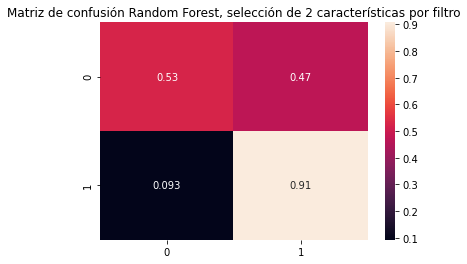

In [54]:
#Parte n

from sklearn.feature_selection import SelectKBest
seleccionn = SelectKBest(k=2).fit_transform(scaled_entrenamiento, entrenamiento.iloc[:,8])
caract= ['preg','plas','pres','skin','insu','mass','pedi','age']
L=[]
for i in range(len(caract)): ##No pude obtnerlo mediante get_param asi que se improviso con una revision por fuerza bruta
    if scaled_entrenamiento[0][i] in seleccionn[0] :
        L.append(caract[i])
    else: None 
print(f"Las mejores 2 características son: {L}")


###############################################
#g
car1n= scaled_entrenamiento[:,1]
car2n= scaled_entrenamiento[:,5]
carsn= np.array([car1n,car2n])
tiempo_rfn_inicio = time.time()
rfn = RandomForestClassifier(max_depth=3, random_state=0,n_estimators=200).fit(carsn.transpose(), entrenamiento.iloc[:,8])
tiempo_rfn_final = time.time()
print(f"El tiempo de entrenamiento es {tiempo_rfn_final - tiempo_rfn_inicio} [s]")
######################################
#h
carv1n= scaled_validacion[:,1]
carv2n= scaled_validacion[:,5]
carsvn= np.array([carv1n,carv2n])
y_pred_rfn = rfn.predict(carsvn.transpose()) #se concatenan las filas traspuestas para que sean columnas
matriz_confusion_rfn = sklearn.metrics.confusion_matrix(validacion.iloc[:,8], y_pred_rfn, normalize='true')
print(f'accuracy = {(matriz_confusion_rfn[0][0]+matriz_confusion_rfn[1][1])/2}')

plt.figure()
sns.heatmap(matriz_confusion_rfn, annot= True)
plt.title('Matriz de confusión Random Forest, selección de 2 características por filtro')
plt.show()


accuracy svm lineal = 0.7430819316332067
accuracy random forest = 0.739464640983903


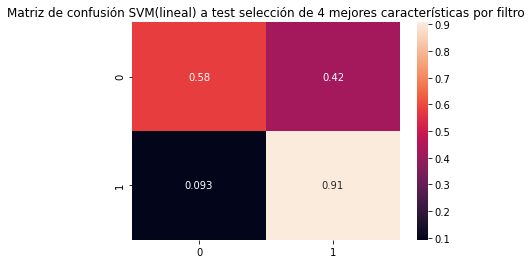

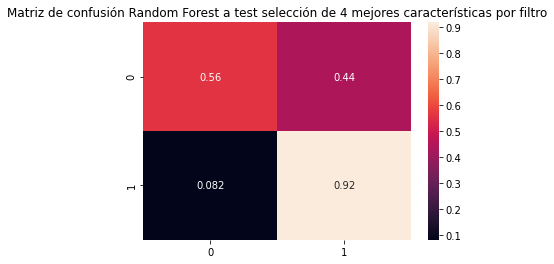

In [55]:
#Parte o
cart1= scaled_test[:,0]
cart2= scaled_test[:,1]
cart3= scaled_test[:,5]
cart4= scaled_test[:,7]
carst= np.array([cart1,cart2,cart3,cart4])

y_pred_svmlo = svmli.predict(carst.transpose()) #se concatenan las filas traspuestas para que sean columnas
y_pred_rfo = rfm.predict(carst.transpose())

matriz_confusion_svmlo = sklearn.metrics.confusion_matrix(test.iloc[:,8], y_pred_svmlo, normalize='true')
matriz_confusion_rfo = sklearn.metrics.confusion_matrix(test.iloc[:,8], y_pred_rfo, normalize='true')


print(f'accuracy svm lineal = {(matriz_confusion_svmlo[0][0]+matriz_confusion_svmlo[1][1])/2}')
print(f'accuracy random forest = {(matriz_confusion_rfo[0][0]+matriz_confusion_rfo[1][1])/2}')

plt.figure()
sns.heatmap(matriz_confusion_svmlo, annot= True)
plt.title('Matriz de confusión SVM(lineal) a test selección de 4 mejores características por filtro')
plt.figure()
sns.heatmap(matriz_confusion_rfo, annot= True)
plt.title('Matriz de confusión Random Forest a test selección de 4 mejores características por filtro')
plt.show()